# Feature Engineering

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.dates as mdates

import time
import seaborn as sns

import random
import matplotlib.dates as mdates #dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

#accessing google cloud storage
#from google.cloud import storage
#from io import BytesIO
#client = storage.Client()
#bucket = "bilderkennung_nf_2020"

In [3]:
plt.style.use('seaborn')

In [4]:
#data = pd.read_csv("gs://bilderkennung_nf_2020/data /jigsaw-unintended-bias-train.csv")

In [5]:
data = pd.read_csv('jigsaw-unintended-bias-train.csv')

In [6]:
data['created_date'].head()

0    2015-09-29 10:50:41.987077+00
1    2015-09-29 10:50:42.870083+00
2    2015-09-29 10:50:45.222647+00
3    2015-09-29 10:50:47.601894+00
4    2015-09-29 10:50:48.488476+00
Name: created_date, dtype: object

In [7]:
#aggreagtion über die stunden, (minuten) --> via groupby

In [8]:
data['toxic'].head()

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.893617
Name: toxic, dtype: float64

In [9]:
#data = data.drop('id', axis=1)

In [10]:
data = data.drop('publication_id', axis=1)

In [11]:
data = data.drop('parent_id', axis=1)

In [12]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
       'sexual_explicit', 'identity_annotator_count',
       'toxicity_annotator_count'],
      dtype='object')

In [13]:
import datetime as dt
data['created_date'] = pd.to_datetime(data['created_date'])

In [14]:
type(data.created_date[1])

pandas._libs.tslibs.timestamps.Timestamp

Trying to fix Unicode Error from the plotly graph below:

In [15]:
#data['created_date_utf8']= str.encode(data['created_date'], 'utf-8')

Create seperate features of hour, day, month, year.

In [16]:
#extract hour
data['created_hour'] = data['created_date'].dt.hour

In [17]:
#extract day
data['created_day'] = data['created_date'].dt.day

In [18]:
#extract month
data['created_month'] = data['created_date'].dt.month

In [19]:
#extract year
data['created_year'] = data['created_date'].dt.year

In [20]:
data.head(2)

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,created_hour,created_day,created_month,created_year
0,59848,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,0,0.0,0,4,10,29,9,2015
1,59849,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,0,0.0,0,4,10,29,9,2015


In [21]:
data['created_hour'].min()

0

In [22]:
data['created_hour'].max()

23

In [23]:
tox_by_month = data.groupby('created_hour').mean()['toxic'].reset_index()
tox_by_month.round(2)

,created_hour,toxic
0,0,0.11
1,1,0.11
2,2,0.11
3,3,0.11
4,4,0.11
5,5,0.11
6,6,0.11
7,7,0.11
8,8,0.11
9,9,0.11


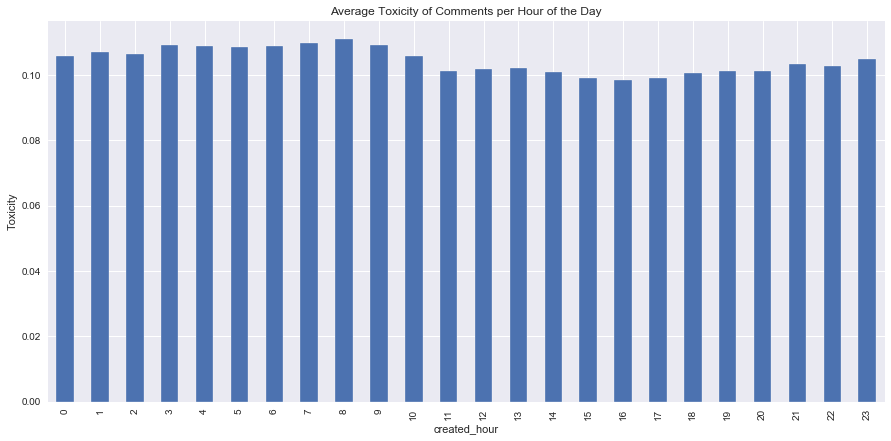

In [57]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set(xlabel='Time of the Day', ylabel='Toxicity',
       title='Average Toxicity of Comments per Hour of the Day')

data.groupby('created_hour').mean()['toxic'].plot.bar(ax=ax);

In [26]:
tox_by_day = data.groupby('created_day').mean()['toxic'].reset_index()
tox_by_day.round(2)

,created_day,toxic
0,1,0.10
1,2,0.10
2,3,0.10
3,4,0.10
4,5,0.10
5,6,0.10
6,7,0.10
7,8,0.10
8,9,0.10
9,10,0.10


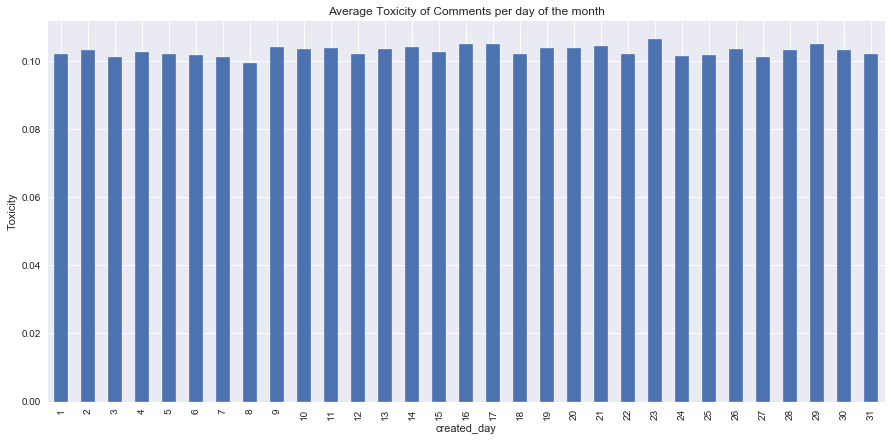

In [56]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set(xlabel='Days per Month', ylabel='Toxicity',
       title='Average Toxicity of Comments per day of the month')
data.groupby('created_day').mean()['toxic'].plot.bar(ax=ax);

In [28]:
tox_by_month = data.groupby('created_month').mean()['toxic'].reset_index()
tox_by_month.round(2)

,created_month,toxic
0,1,0.11
1,2,0.10
2,3,0.09
3,4,0.10
4,5,0.10
5,6,0.10
6,7,0.10
7,8,0.11
8,9,0.11
9,10,0.11


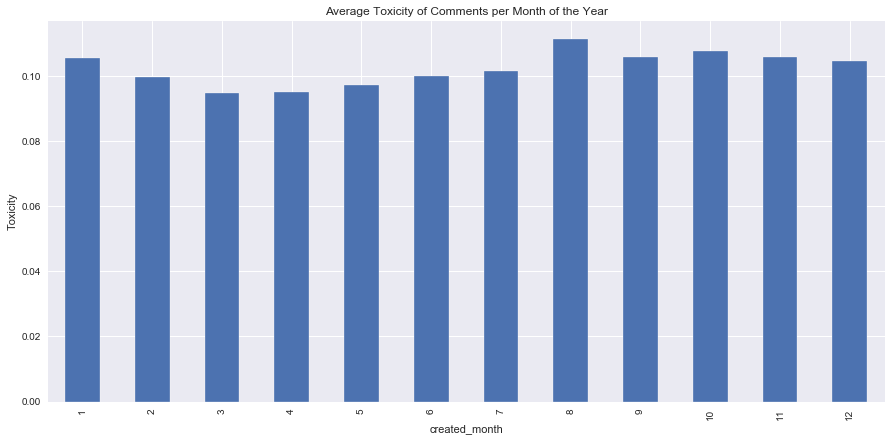

In [55]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set(xlabel='Months per Year', ylabel='Toxicity',
       title='Average Toxicity of Comments per Month of the Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
data.groupby('created_month').mean()['toxic'].plot.bar(ax=ax);

In [30]:
tox_by_year = data.groupby('created_year').mean()['toxic'].reset_index()
tox_by_year.round(2)

,created_year,toxic
0,2015,0.06
1,2016,0.10
2,2017,0.10


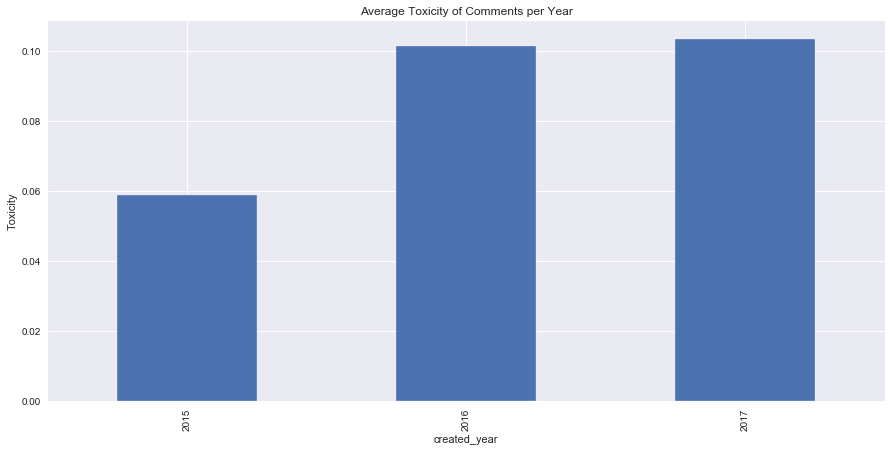

In [60]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set(xlabel='Year', ylabel='Toxicity',
       title='Average Toxicity of Comments per Year')
data.groupby('created_year').mean()['toxic'].plot.bar(ax=ax);

Times with highest comment frequency:

In [25]:
data['created_hour'].mode()

0    17
dtype: int64

In [26]:
data['created_day'].mode()

0    6
dtype: int64

In [27]:
data['created_month'].mode()

0    10
dtype: int64

In [28]:
data['created_year'].mode()

0    2017
dtype: int64

In [29]:
#earliest post
data['created_date'].min()

Timestamp('2015-09-29 10:50:41.987077+0000', tz='UTC')

In [30]:
#latest post
data['created_date'].max()

Timestamp('2017-11-11 01:01:10.822969+0000', tz='UTC')

In [ ]:
#tox_hour = pd.to_datetime(data.timestamp)
#toxic_time = pd.Series(data=np.array(data.toxic), 
 #                          index=pd.DatetimeIndex(temperature_time_arr), dtype="float")

In [ ]:
#ts_temperature_hour = ts_temperature.resample("H").mean()

In [ ]:
#ax = plt.figure(figsize=(5,2), dpi=150).add_subplot(111)
#ts_temperature_hour.plot(ax=ax, title="Temperature per hour", color="red")

**Plotly**

In [34]:
import chart_studio
chart_studio.tools.set_credentials_file(username='dren', api_key='••••••••••')

In [35]:
import chart_studio
chart_studio.tools.set_config_file(world_readable=False,
                             sharing='private')

In [53]:
import chart_studio.plotly as py
import plotly.graph_objects as go

In [54]:
time_series = data.loc[:, ('toxic', 'created_date')]

In [55]:
time_series['created_date'] = pd.to_datetime(time_series['created_date'])

In [56]:
time_series = time_series.sort_values(by=['created_date'])

In [57]:
 #np.sort(time_series.created_date)

In [60]:
#sample = time_series.head(1000)

In [63]:
time_data = go.Scatter(x= time_series.created_date,
                         y= time_series.toxic)

layout = go.Layout(title='Toxic Times', xaxis=dict(title='Date'),
                   yaxis=dict(title='toxicity of comments'))

fig = go.Figure(data=[time_data], layout=layout)
fig

In [64]:
#need to use dash